<a href="https://colab.research.google.com/github/thinhntr/ai_from_scratch/blob/main/ml/cluster/kmeans_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare environment

In [29]:
!git clone https://github.com/thinhntr/ai_from_scratch.git
% cd ai_from_scratch
!ls 

Cloning into 'ai_from_scratch'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 110 (delta 43), reused 83 (delta 28), pack-reused 0
Receiving objects: 100% (110/110), 115.51 KiB | 9.63 MiB/s, done.
Resolving deltas: 100% (43/43), done.
/content/ai_from_scratch/ai_from_scratch/ai_from_scratch/ai_from_scratch
LICENSE  ml  README.md


# Import

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from ml.cluster import KMeans as MyKMeans

# Init data

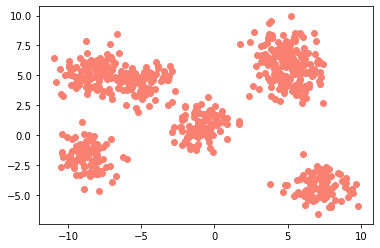

In [31]:
n_samples = 690
n_clusters = 7
X, y_true = make_blobs(n_samples=n_samples,
                                     centers=n_clusters,
                                     random_state=29)
plt.scatter(X[:, 0], X[:, 1], c='salmon')

# Predict

## My result

In [32]:
my_model = MyKMeans(n_clusters, 254)
my_model.fit(X)
my_model.predict(X)
my_centroids = my_model.centroids
my_init_centroids = my_model.first_centroids
print(my_init_centroids)
print(my_centroids)


[[-9.79986365  5.05110561]
 [-3.4894375   4.88931233]
 [-9.90402184 -2.06659285]
 [-4.97975971  4.26791213]
 [-8.07044821  3.97791935]
 [-2.06513363  1.33133121]
 [ 4.43074965  6.97677254]]
[[-9.28215442  5.16801806]
 [-0.88202706  0.77325396]
 [-8.71533285 -1.83475633]
 [-4.70953262  4.32520079]
 [-7.34105732  5.11575279]
 [ 7.2722567  -4.34738559]
 [ 4.98548388  5.88227428]]


## sklearn result


In [33]:
sk_model = KMeans(n_clusters)
sk_model.fit_predict(X)
sk_centroids = sk_model.cluster_centers_
print(sk_centroids)

[[-0.88202706  0.77325396]
 [ 7.2722567  -4.34738559]
 [ 5.35954738  4.77205845]
 [-8.43841847  5.18917326]
 [-8.71533285 -1.83475633]
 [ 4.54076394  7.20219753]
 [-4.92581861  4.37435988]]


# Comparision

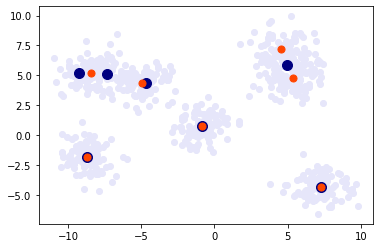

In [34]:
plt.scatter(X[:, 0], X[:, 1], c='lavender')  # Original data
plt.scatter(my_centroids[:, 0], my_centroids[:, 1], c='navy', s=100)  # my result
plt.scatter(sk_centroids[:, 0], sk_centroids[:, 1], c='orangered', s=50)  # sklearn result
# plt.scatter(my_init_centroids[:, 0], my_init_centroids[:, 1], c='lime', s=50)  # my init point

## Difference between our centers and sklearn centers

In [35]:
mine = np.sort(my_centroids, axis=0)
their = np.sort(sk_centroids, axis=0)
print(mine)
print(their)
diff = np.linalg.norm(mine - their, axis=1)
print(diff.sum())


[[-9.28215442 -4.34738559]
 [-8.71533285 -1.83475633]
 [-7.34105732  0.77325396]
 [-4.70953262  4.32520079]
 [-0.88202706  5.11575279]
 [ 4.98548388  5.16801806]
 [ 7.2722567   5.88227428]]
[[-8.71533285 -4.34738559]
 [-8.43841847 -1.83475633]
 [-4.92581861  0.77325396]
 [-0.88202706  4.37435988]
 [ 4.54076394  4.77205845]
 [ 5.35954738  5.18917326]
 [ 7.2722567   7.20219753]]
14.215052091007635
